<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='http://www.uff.br'>
<img align='left' style='display: block;height: 92%' src='imgs/UFF.png' alt='UFF logo' title='UFF logo'/>
</a>
<a href='http://www.ic.uff.br'>
<img align='left' style='display: block;height: 100%' src='imgs/logo-ic.png' alt='IC logo' title='IC logo'/>
</a>
</div>

### Machine Learning
# Deep Learning Neural Networks

### [Luis Martí](http://lmarti.com)
#### [Instituto de Computação](http://www.ic.uff)
#### [Universidade Federal Fluminense](http://www.uff.br)
#### [`http://lmarti.com/2016-1-ml`](http://lmarti.com/2016-1-ml)
$\newcommand{\vec}[1]{\boldsymbol{#1}}$

In [1]:
# importing...
import random
random.seed(a=42) # fixing a seed for reproducibility, do not do this in real life. 

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
seaborn.set_style('whitegrid')
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [3]:
# tikzmagic extesion for figures - https://github.com/mkrphys/ipython-tikzmagic
%load_ext tikzmagic

In [4]:
# for rendering graphviz dot files - https://github.com/cjdrake/ipython-magic
%load_ext gvmagic

### About the notebook/slides

* The slides are _programmed_ as a [Jupyter](http://jupyter.org)/[IPython](https://ipython.org/) notebook.
* **Feel free to try them and experiment on your own by launching the notebooks.**

* You can run the notebook online: [![Binder](http://mybinder.org/badge.svg)](http://mybinder.org/repo/lmarti/machine-learning)

If you are using [nbviewer](http://nbviewer.jupyter.org) you can change to slides mode by clicking on the icon:

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
      <div class='well well-sm'>
              <img src='imgs/view-as-slides.png'/>
      </div>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

## Big data

* *Buzzword* implying that you are able to handle large amounts of data.
* Algorithmical and technical challenges.
* Dimensions:
    * Number of records or entries (this is mostly a technical challenge).
    * Number of variables to take into account.
    * Complex data representation i.e. images.

## Handling images

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class="col-md-8">
      <div class='well well-sm'>
              <img src='imgs/06/challenges.jpeg'/>
      </div>
      </div>
      <div class="col-md-2" align='center'>
      </div>
  </div>
</div>

# Dealing with this complex and high-dimensional data

* Intuitively we'd expect networks with many more hidden layers to be more powerful.
* Such networks could use the intermediate layers to build up multiple levels of abstraction.
* Extract progressively more abstract features.
* A deep network could have a better performance than a shallow one with the same number of neurons?

Deep neural networks at last!

For example, doing visual pattern recognition:
* neurons in the first hidden layer might learn to recognize edges,
* neurons in the second layer could learn to recognize more complex shapes, say triangle or rectangles, built up from edges. 
* The third layer would then recognize still more complex shapes. 
* And so on.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3" align='center'>
      </div>
      <div class="col-md-6">
      <div class='well well-sm'>
              <img src='imgs/06/AI_system_parts.png'/>
      </div>
      </div>
      <div class="col-md-3" align='center'>
      </div>
  </div>
</div>
<small> From http://rinuboney.github.io/2015/10/18/theoretical-motivations-deep-learning.html</small>

# Learning deep MLP

* Intuitively, nothing stop us from training deep MLPs with the backpropagation algorithm.
* However, results are worst than *shallow* architectures.

### Why?

* This contradicts our intuition.
* In the worst case we should have layers "doing nothing" but not worsening the results.

## Investigating the issue

* We need a measure of of progress of learning -> our gradients.
* I have already told you that is important to check the gradients.
* We have the vectors $\vec{\delta}^1,\ldots,\vec{\delta}^l,\ldots$ of the deltas corresponding to each layer.
* We can use the norm of the vector $\left|\vec{\delta}^l\right|$ as an indicator of how much learning is taking place in each layer. 

Gradient descent with just 1,000 training images, trained over 500 epochs on the MNIST dataset.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3" align='center'>
      </div>
      <div class="col-md-6">
      <div class='well well-sm'>
              <img src='imgs/06/training_speed_2_layers.png'/>
      </div>
      </div>
      <div class="col-md-3" align='center'>
      </div>
  </div>
</div>
<small> more examples on http://neuralnetworksanddeeplearning.com/chap5.html.</small>

* The two layers start out learning at very different speeds
* The speed in both layers then drops very quickly, before rebounding. 
* *The first hidden layer learns much more slowly than the second hidden layer*.

## What about a three hidden layers network?

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3" align='center'>
      </div>
      <div class="col-md-6">
      <div class='well well-sm'>
              <img src='imgs/06/training_speed_3_layers.png'/>
      </div>
      </div>
      <div class="col-md-3" align='center'>
      </div>
  </div>
</div>

## And with four?

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3" align='center'>
      </div>
      <div class="col-md-6">
      <div class='well well-sm'>
              <img src='imgs/06/training_speed_4_layers.png'/>
      </div>
      </div>
      <div class="col-md-3" align='center'>
      </div>
  </div>
</div>

### The phenomenon is known as the 
# Vanishing/Exploding Gradient Problem

Was reported by:
* Gradient flow in recurrent nets: the difficulty of learning long-term dependencies, by Sepp Hochreiter, Yoshua Bengio, Paolo Frasconi, and Jürgen Schmidhuber (2001).
* Sepp Hochreiter's earlier Diploma Thesis, Untersuchungen zu dynamischen neuronalen Netzen (1991, in German).

But, probably every body that worked in neural networks had eventually made an experiment like the previous one.

* It turns out that the gradient in deep neural networks is **unstable**, 
* tending to either **explode** or **vanish** in earlier layers. 
* This instability is a fundamental problem for gradient-based learning in deep neural networks. 
* It's something we need to understand and address.

# What's causing the vanishing gradient problem?

Lets picture a simple deep network:

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class="col-md-8">
      <div class='well well-sm'>
              <img src='imgs/06/tikz37.png'/>
      </div>
      </div>
      <div class="col-md-2" align='center'>
      </div>
  </div>
</div>
Here, $w_1, w_2,\ldots$, are the weights, $b_1,b_2,\ldots$ are the biases, and $C$ is some cost function. 
$$
\frac{\partial C}{\partial b_1} = 
f'(\text{net}_1)\times w_2 \times f'(\text{net}_2) \times w_3 \times f'(\text{net}_3) \times w_4 \times f'(\text{net}_5) \times
\frac{\partial C}{\partial \hat{y}}.
$$

"What makes deep networks hard to train?" is a complex question:
*  instabilities associated to gradient-based learning in deep networks.
* Evidence suggest that there is also a role played by the choice of activation function, 
* the way weights are initialized, and 
* how learning by gradient descent is implemented. 

Many factors play a role in making deep networks hard to train, and understanding all those factors is still a subject of ongoing research.

# What of we train each layer separately?

 ## Autoencoders

* An autoencoder is typically a MLP neural network which aims to learn a compressed, distributed representation (encoding) of a dataset.
* They learn to predict their inputs.

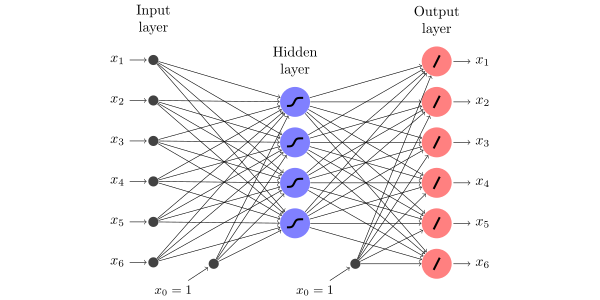

In [5]:
%tikz -s 600,300 -sc 1.0 -l positioning -f svg \input{imgs/05/autoencoder.tikz}

## Stacked autoencoders

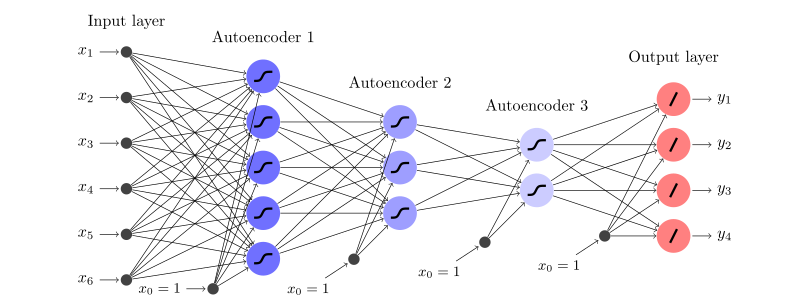

In [18]:
%tikz -s 800,300 -sc 1.0 -l positioning -f svg \input{imgs/05/stacked-autoencoder.tikz}


* The hidden layer of autoencoder $t$  acts as an input layer to autoencoder $t+1$.
* The input layer of the first autoencoder is the input layer for the whole network.

The greedy layer-wise training procedure works like this:
* Train the hidden layers as autoencoders in succession.
* Train final (output layer) to predict targets.

# Can we look back (again) to nature for inspiration?

# Convolutional Neural Networks (CNNs / ConvNets)

Convolutional Neural Networks are very similar to ordinary neural networks:

* They are made up of neurons that have learnable weights and biases. 
* Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linear activation. 
* The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other.
* They still have a loss function on the last (fully-connected) layer and all the tips/tricks we debated for learning regular NN still apply.

Difference: 
* ConvNetz make the explicit assumption that the inputs are images, this allows to encode certain properties into the architecture. 
* Forward function more efficient to implement and vastly reduce the amount of parameters in the network.
* Main application: image classification.

## Yet another problem with regular NNs

* Regular Neural Nets don’t scale well to full images.
* Images  only of size 32x32x3 (32 wide, 32 high, 3 color channels), imply that the first hidden layer will have 32*32*3 = 3072 weights.
* This fully-connected structure does not scale to larger images. 
* For example, an image of more "normal" size, e.g. 200x200x3, would lead to neurons that have 200*200*3 = 120,000 weights. 
* Moreover, we would almost certainly want to have several such neurons, so the parameters would add up quickly! 
* Clearly, this full connectivity is wasteful.
* The huge number of parameters would quickly lead to overfitting.

Convolutional Neural Networks take advantage of the fact that the input consists of images

* constrain the architecture in a more sensible way. 
* unlike a regular Neural Network, the layers of a ConvNet have neurons arranged in 3 dimensions: width, height, depth.
* neurons in a layer will only be connected to a small region of the layer before it, instead of all of the neurons in a fully-connected manner.
* The ConvNet architecture we will reduce the full image into a single vector of class scores, arranged along the depth dimension.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-1" align='center'>
      </div>
      <div class="col-md-5">
      <div class='well well-sm' align='center'>Regular network
              <img src='imgs/06/conv.jpeg'/>
      </div>
      </div>
      <div class="col-md-5">
      <div class='well well-sm' align='center'>ConvNet
              <img src='imgs/06/cnn.jpeg'/>
      </div>
      </div>
      <div class="col-md-1" align='center'>
      </div>
  </div>
</div>

## Key concepts

* **Local receptive fields**: We won't connect every input pixel to every hidden neuron. Instead, we only make connections in small, localized regions of the input image.
* **Shared weights and biases**.
* **Pooling**: usually used immediately after convolutional layers. They simplify the information in the output from the convolutional layer.

## ConvNets layer types

* As we described above, a ConvNet is a sequence of layers, and
* every layer of a ConvNet transforms one volume of activations to another through a differentiable function. 
* Three main types of layers to build ConvNet architectures: 
    * Convolutional Layer, 
    * Rectified linear units (RELU) Layer,
    * Pooling Layer, and 
    * Fully-Connected Layer (exactly as seen in regular Neural Networks). 

We will stack these layers to form a full ConvNet architecture.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-1" align='center'>
      </div>
      <div class="col-md-10">
      <div class='well well-sm' align='center'>
              <img src='imgs/06/convnet.jpeg'/>
      </div>
      </div>
      <div class="col-md-1" align='center'>
      </div>
  </div>
</div>

## Convolutional Layer

The convolutional layer is the core building block of a convolutional network that does most of the computational heavy lifting.
* consist of a set of learnable filters. 
* Every filter is small spatially (along width and height), but extends through the full depth of the input volume. 

For example,
* a typical filter on a first layer of a ConvNet might have size 5x5x3 (i.e. 5 pixels width and height, and 3 color channels).
* During the forward pass, we slide (*convolve*) each filter across the width and height of the input volume and compute dot products between the entries of the filter and the input at any position. 
* We will produce a 2-dimensional activation map that gives the responses of that filter at every spatial position. 

* The network will learn filters that activate when they see some type of visual feature:
    * an edge of some orientation or a blotch of some color on the first layer, or 
    * entire honeycomb or wheel-like patterns on higher layers of the network.
* We will have an entire set of filters in each CONV layer (e.g. 12 filters), and each of them will produce a separate 2-dimensional activation map. We will stack these activation maps along the depth dimension and produce the output volume.

## Spatial arrangement

How many neurons there are in the output volume and how they are arranged?
Three hyperparameters control the size of the output volume: 
* depth, 
* stride and 
* zero-padding.

### Depth of the output volume 

Corresponds to the number of filters we would like to use, 
* each learning to look for something different in the input. 

For example, if the first Convolutional Layer takes as input the raw image, then different neurons along the depth dimension may activate in presence of various oriented edged, or blobs of color.

### Stride

* We must specify the stride with which we slide the filter. 
* When the stride is 1 then we move the filters one pixel at a time.
* When the stride is 2 (or uncommonly 3 or more, though this is rare in practice) then the filters jump 2 pixels at a time as we slide them around. 
* This will produce smaller output volumes spatially.

### Zero padding

* Sometimes it is convenient to pad the input volume with zeros around the border.
* The nice feature of zero padding is that it will allow us to control the spatial size of the output volumes.

### Shared weight and biases

* All neurons in the layer detect the same *feature*.
* We need to add layers to encode more features.

<div align='center'>
<img src='http://neuralnetworksanddeeplearning.com/images/tikz46.png' width='47%'/>
</div>

<div class="container-fluid">
  <div class="row">
      <div class="col-md-1" align='center'>
      </div>
      <div class="col-md-10">
      <div class='well well-sm' align='center'>
              <img src='imgs/06/weights.jpeg'/>
      </div>
      </div>
      <div class="col-md-1" align='center'>
      </div>
  </div>
</div>
Krizhevsky et al. Each of the 96 filters shown here is of size [11x11x3], and each one is shared by the 55*55 neurons in one depth slice

## Summarizing the Convolutional layer
* Accepts a volume of size $W_1\times H_1\times D_1$
* Requires four hyperparameters:
    * Number of filters $K$,
    * their spatial extent $F$,
    * the stride $S$,
    * the amount of zero padding $P$.
Produces a volume of size $W_2\times H_2\times D_2$ where:
$$
W_2 = \frac{W_1−F+2P}{S+1},\ H_2 = \frac{H_1−F+2P}{S+1},\ D_2=K
$$

## Pooling

* Subsampling layers reduce the size of the input. 

* There are multiple ways to subsample, but the most popular are:
    - max pooling (most popular), 
    - average pooling, and
    - stochastic pooling.

In max-pooling, a pooling unit simply outputs the maximum activation in the 2×22×2 input region:
<div class="container-fluid">
  <div class="row">
      <div class="col-md-1" align='center'>
      </div>
      <div class="col-md-10">
      <div class='well well-sm' align='center'>
              <img src='http://neuralnetworksanddeeplearning.com/images/tikz47.png'/>
      </div>
      </div>
      <div class="col-md-1" align='center'>
      </div>
  </div>
</div>

We can see convolution as the application of a filter or a dimensionality reduction.

* Convolutional layers apply a number of filters to the input. 
* The result of one filter applied across the image is called feature map.
* If the previous layer is also convolutional, the filters are applied across all of it’s FMs with different weights, so each input FM is connected to each output FM. 
> The intuition behind the shared weights across the image is that the features will be detected regardless of their location, while the multiplicity of filters allows each of them to detect different set of features.

* The convolutional architecture is quite different to the architecture of traditional neural network.
* But the overall picture is similar: 
    * a network made of many simple units, 
    * whose behaviors are determined by their weights and biases. 
The overall goal is still the same: to use training data to train the network's weights and biases so that the network does a good job classifying input.

## Restricted Boltzmann machines

Restricted Boltzmann machines (RBM) are generative stochastic neural network that can learn a probability distribution over its set of inputs.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3" align='center'>
      </div>
      <div class="col-md-6">
      <div class='well well-sm' align='center'>
              <img src='imgs/06/rbm.png'/>
      </div>
      </div>
      <div class="col-md-3" align='center'>
      </div>
  </div>
</div>

## Training RBMs: Contrastive Divergence

* **Positive phase:**
    - An input sample $\vec{x}$ is presented to the input layer. 
    - $\vec{x}$ is propagated to the hidden layer in a similar manner to the feedforward networks. 
    - The result is the hidden layer activations, $\vec{h}$.
* **Negative phase:**
    - Propagate $\vec{h}$ back to the visible layer with result resulting in a $\vec{x}'$.
    - $\vec{x}'$ back to the hidden layer.
* **Weight update**:
$$ \vec{w}(t+1) = \vec{w}(t) + \alpha (\vec{x}\vec{h}^{\intercal} -\vec{x'}\vec{h'}^{\intercal}).$$

* The positive phase reflects the network internal representation of the data.
* The negative phase represents an attempt to recreate the data based on this internal representation. 

* The goal is that the "generated" data to be as close as possible to the "real" one.
* This is reflected in the weight update formula.

> In other words, the net has a perception of how the input data must be represented, so it tries to reproduce the data based on this perception. If its reproduction isn’t close enough to reality, it makes an adjustment and tries again.

## Deep Belief Networks

Restricted Boltzmann machines can be stacked to create a class of neural networks known as deep belief networks (DBNs).
<div class="container-fluid">
  <div class="row">
      <div class="col-md-3" align='center'>
      </div>
      <div class="col-md-6">
      <div class='well well-sm' align='center'>
              <img src='imgs/06/deep-belief.png'/>
      </div>
      </div>
      <div class="col-md-3" align='center'>
      </div>
  </div>
</div>

## Programming Deep Learning

* Theano - An open source machine learning library for Python.
* Torch - An open source software library for machine learning based on the Lua programming language.
* Caffe - A deep learning framework.
* Apache SINGA - A deep learning platform developed for scalability, usability and extensibility.

My current preference:
* Tensorflow

# General Principles

* Supervise the learning process (did I mentioned that you should check your gradients?).
* Use a correct experimental methodology.
* Contrast your results with a baseline method.

# [Applications of Deep Learning](https://en.wikipedia.org/wiki/Deep_learning#Applications)

There are many successfull applications, for example:

* Computer vision and image recognition;
* Speech recognition;
* Natural language processing $\rightarrow$ probabilistic context free grammars;
* Anomaly detection on many variables;
* ... and many more. 

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>

# Final remarks

* Deep learning as a step towards realising *strong AI*;
* thus many organizations have become interested in its use for particular applications.
    * see https://en.wikipedia.org/wiki/Deep_learning#Commercial_activities
* Better understanding of mental processes.
* Deep learning $\iff$ big data.

In [7]:
%load_ext version_information
%version_information scipy, numpy, matplotlib, sklearn

Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.2.0
OS Darwin 15.5.0 x86_64 i386 64bit
scipy 0.17.1
numpy 1.11.0
matplotlib 1.5.1
sklearn 0.17.1
Wed Jun 08 22:36:35 2016 BRT

In [8]:
# this code is here only for cosmetic reasons
from IPython.core.display import HTML
HTML(open('custom/custom.include', 'r').read())